# About Dataset
This data include bigger format store types such as supermarkets, hypermarkets as well as smaller traditional trade grocery stores (Kirana stores), medical stores etc.

Dataset: https://www.kaggle.com/datasets/iamprateek/store-transaction-data/data

# Problem Statement:
The objective is to conduct Exploratory Data Analysis (EDA) to uncover valuable insights into customer preferences, purchasing trends, and overall behavior.

# Import Necessary Library

In [14]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

# Import Data

In [2]:
df = pd.read_csv('Hackathon_Working_Data.csv')
df.head()

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT


# Exploring data

In [3]:
df.shape

(26985, 14)

In [4]:
print(df.isnull().sum())

MONTH        0
STORECODE    0
DAY          0
BILL_ID      0
BILL_AMT     0
QTY          0
VALUE        0
PRICE        0
GRP          0
SGRP         0
SSGRP        0
CMP          0
MBRD         0
BRD          0
dtype: int64


In [5]:
print(df.describe())

                DAY      BILL_AMT           QTY         VALUE         PRICE
count  26985.000000  26985.000000  26985.000000  26985.000000  26985.000000
mean      15.167019    278.754206      4.105021     67.808551     52.812982
std        8.956057    541.398504     95.666947    118.005978     84.987730
min        1.000000      0.000000      0.500000      0.000000      0.000000
25%        7.000000     40.000000      1.000000     10.000000     10.000000
50%       14.000000    111.000000      1.000000     30.000000     22.000000
75%       23.000000    280.000000      2.000000     80.000000     64.000000
max       31.000000   7292.000000  12000.000000   3150.000000   3150.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26985 entries, 0 to 26984
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      26985 non-null  object 
 1   STORECODE  26985 non-null  object 
 2   DAY        26985 non-null  int64  
 3   BILL_ID    26985 non-null  object 
 4   BILL_AMT   26985 non-null  float64
 5   QTY        26985 non-null  float64
 6   VALUE      26985 non-null  float64
 7   PRICE      26985 non-null  float64
 8   GRP        26985 non-null  object 
 9   SGRP       26985 non-null  object 
 10  SSGRP      26985 non-null  object 
 11  CMP        26985 non-null  object 
 12  MBRD       26985 non-null  object 
 13  BRD        26985 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.9+ MB


# Observation
* There are 26984 rows and 12 columns in the dataset
* The DataFrame has a mix of numerical and categorical data.


In [7]:
df.columns

Index(['MONTH', 'STORECODE', 'DAY', 'BILL_ID', 'BILL_AMT', 'QTY', 'VALUE',
       'PRICE', 'GRP', 'SGRP', 'SSGRP', 'CMP', 'MBRD', 'BRD'],
      dtype='object')

### Columns Descriptions

* MONTH: month id (M1, M2, M3)
* STORECODE: store code (N1, N2, â€¦, N10)
* Day: day of the month
* BILL_ID: Bill ID (T1,T2,â€¦)
* BILL_AMT: bill amount 
* QTY: sales unit
* VALUE: sales price
* PRICE: selling price per unit
* GRP: category
* SGRP: subcategory
* SSGRP: sub sub category
* CMP: company/manufacture
* MBRD: mother brand
* BRD: brand


In [8]:
df.head()

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT


# EDA

In [9]:
# Calculate total spending per customer
total_spending = df.groupby('STORECODE')['BILL_AMT'].sum()

# Calculate average spending per transaction
avg_spending_per_transaction = df.groupby('STORECODE')['BILL_AMT'].mean()

# Calculate frequency of transactions per customer
transaction_frequency = df['STORECODE'].value_counts()

total_spending = total_spending.reindex(['N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10'])
avg_spending_per_transaction = avg_spending_per_transaction.reindex(['N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10'])
transaction_frequency = transaction_frequency.reindex(['N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10'])

print(total_spending)
print(avg_spending_per_transaction)
print(transaction_frequency)

STORECODE
N1      626464.78
N2      794062.00
N3      494536.37
N4      872215.70
N5      695755.00
N6      366530.00
N7     1036821.74
N8      492817.35
N9     1592872.31
N10     550107.00
Name: BILL_AMT, dtype: float64
STORECODE
N1      136.693166
N2      596.590533
N3      275.815042
N4      271.549097
N5      157.019860
N6      309.308017
N7      184.323865
N8      436.894814
N9     1042.455700
N10     253.622407
Name: BILL_AMT, dtype: float64
N1     4583
N2     1331
N3     1793
N4     3212
N5     4431
N6     1185
N7     5625
N8     1128
N9     1528
N10    2169
Name: STORECODE, dtype: int64


# 1. Comparison of Total Spending per Customer, Average Spending per Transaction and Transaction Frequency per Customer

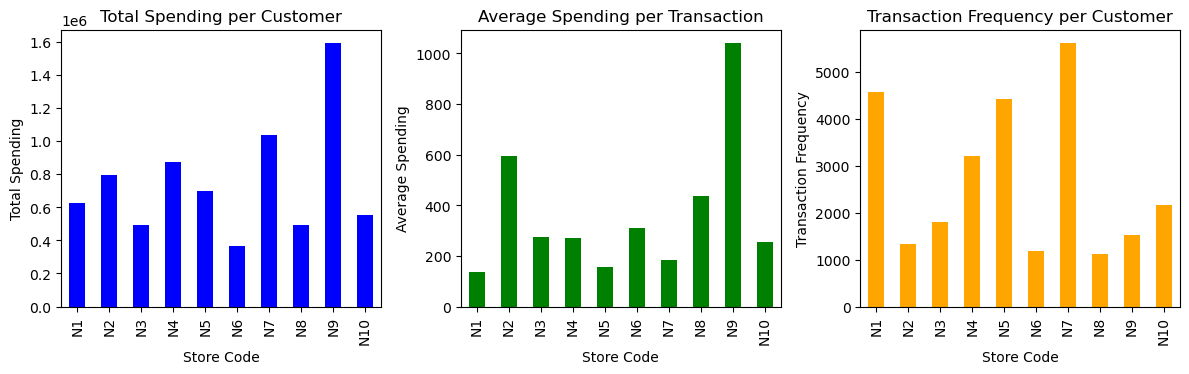

In [10]:
# Plot Total Spending per Customer
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
total_spending.plot(kind='bar', color='blue')
plt.title('Total Spending per Customer')
plt.xlabel('Store Code')
plt.ylabel('Total Spending')

# Plot Average Spending per Transaction
plt.subplot(1, 3, 2)
avg_spending_per_transaction.plot(kind='bar', color='green')
plt.title('Average Spending per Transaction')
plt.xlabel('Store Code')
plt.ylabel('Average Spending')

# Plot Transaction Frequency per Customer
plt.subplot(1, 3, 3)
transaction_frequency.plot(kind='bar', color='orange')
plt.title('Transaction Frequency per Customer')
plt.xlabel('Store Code')
plt.ylabel('Transaction Frequency')

plt.tight_layout()
plt.show()

# 2. Day-wise Spending

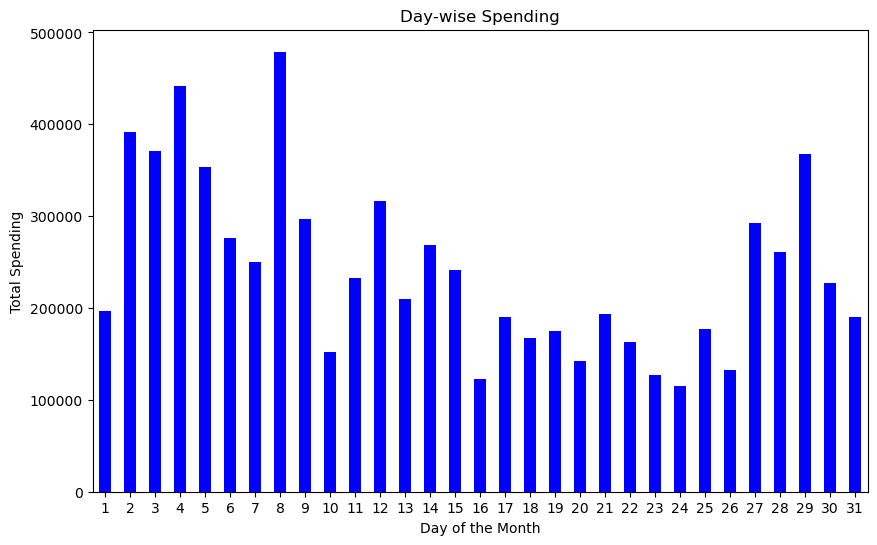

In [11]:
# Calculate day-wise spending
day_wise_spending = df.groupby(df['DAY'])['BILL_AMT'].sum()

# Plot the graph
plt.figure(figsize=(10, 6))
day_wise_spending.plot(kind='bar', color='blue')
plt.title('Day-wise Spending')
plt.xlabel('Day of the Month')
plt.ylabel('Total Spending')
plt.xticks(rotation=0)
plt.show()

#  3. Day-wise spending for Each Month

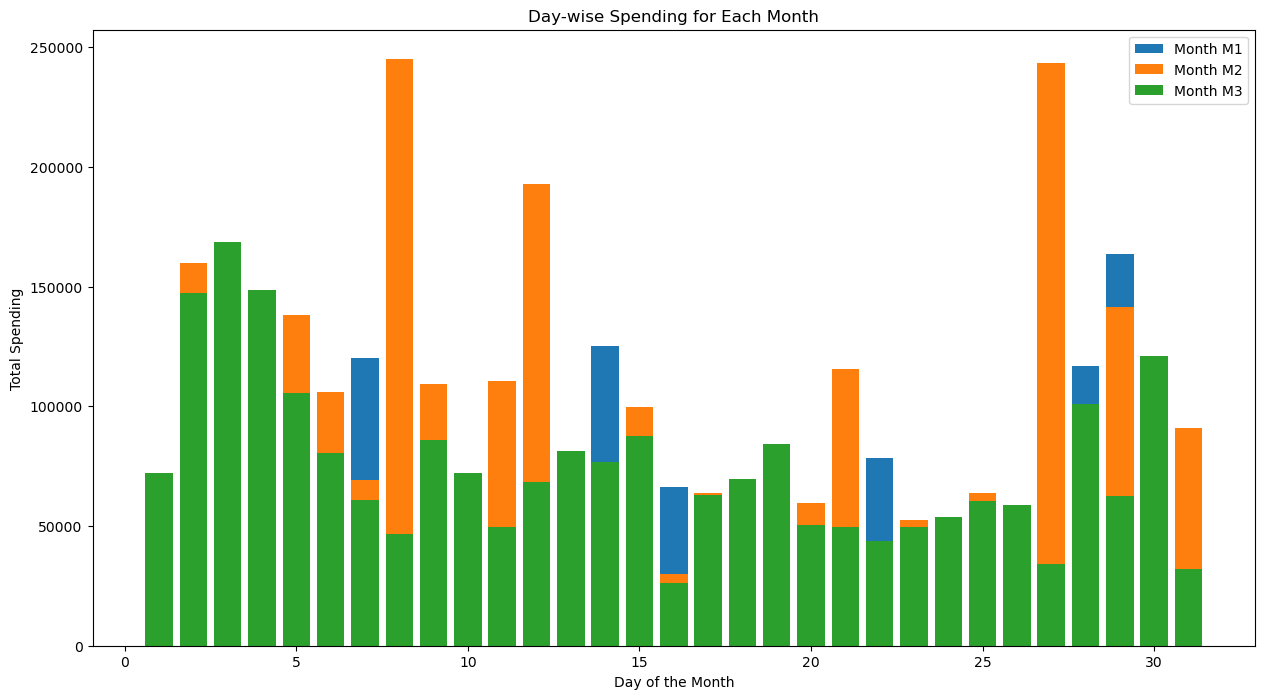

In [12]:
month_wise_spending = df.groupby(['MONTH', df['DAY']])['BILL_AMT'].sum()

# Plot the graphs for each month
months = df['MONTH'].unique()

plt.figure(figsize=(15, 8))

for month in months:
    monthly_data = month_wise_spending[month]
    plt.bar(monthly_data.index, monthly_data, label=f'Month {month}')

plt.title('Day-wise Spending for Each Month')
plt.xlabel('Day of the Month')
plt.ylabel('Total Spending')
plt.legend()
plt.xticks(rotation=0)
plt.show()

# 4. Comparsion of Top 20 Most Selling Products

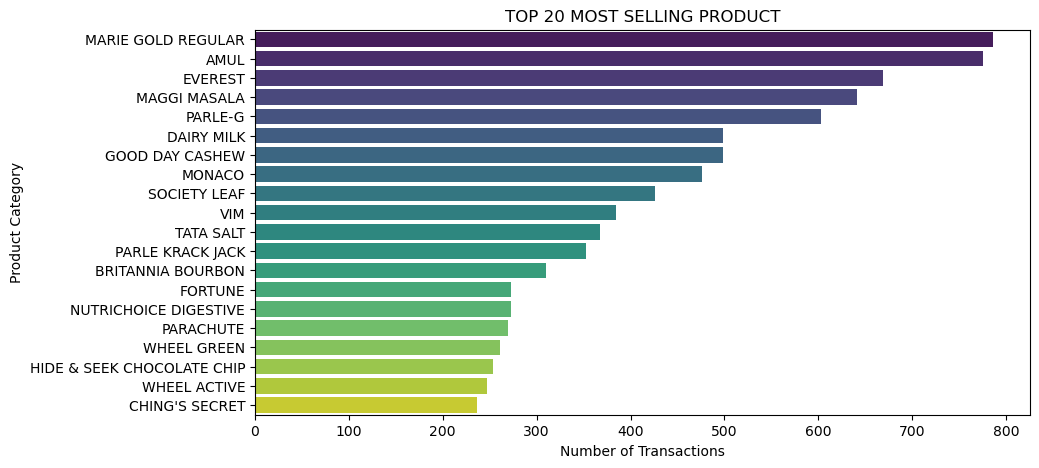

In [24]:
top_categories = df['BRD'].value_counts().head(20)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.xlabel('Number of Transactions')
plt.ylabel('Product Category')
plt.title('TOP 20 MOST SELLING PRODUCT')
plt.show()

# 5. Comparison of Top 20 Most Selling Company Products

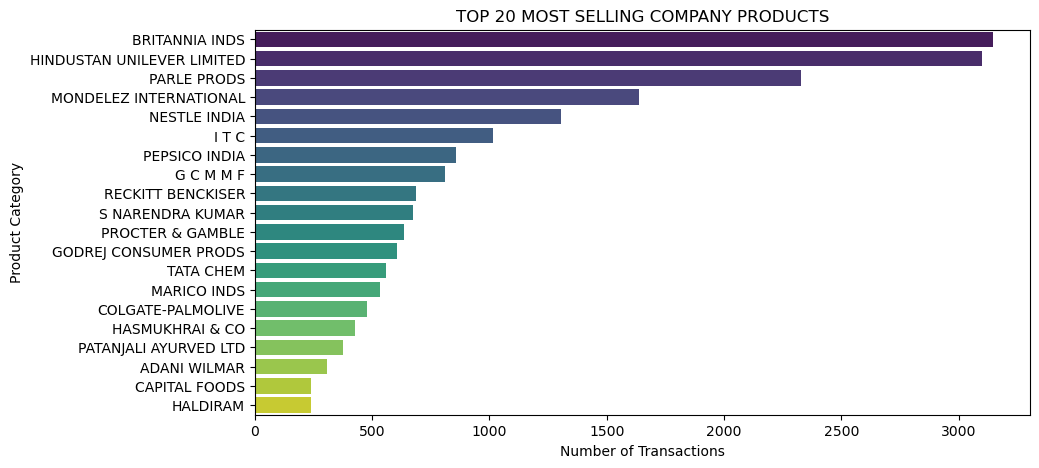

In [25]:
top_categories = df['CMP'].value_counts().head(20)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.xlabel('Number of Transactions')
plt.ylabel('Product Category')
plt.title('TOP 20 MOST SELLING COMPANY PRODUCTS')
plt.show()

# 6. Comparison of Top 20 Category

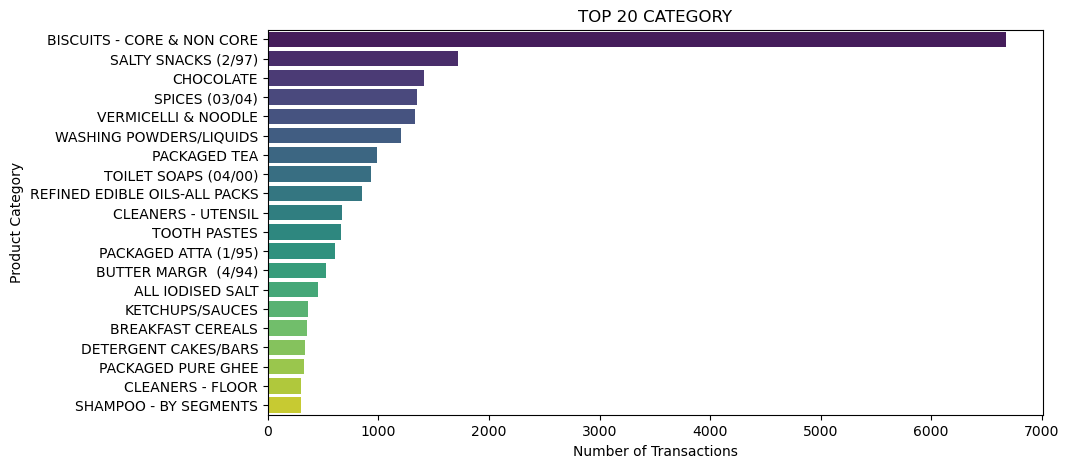

In [27]:
top_categories = df['GRP'].value_counts().head(20)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.xlabel('Number of Transactions')
plt.ylabel('Product Category')
plt.title('TOP 20 CATEGORY')
plt.show()

# 7. Comparison of Top 20 Mother Brand

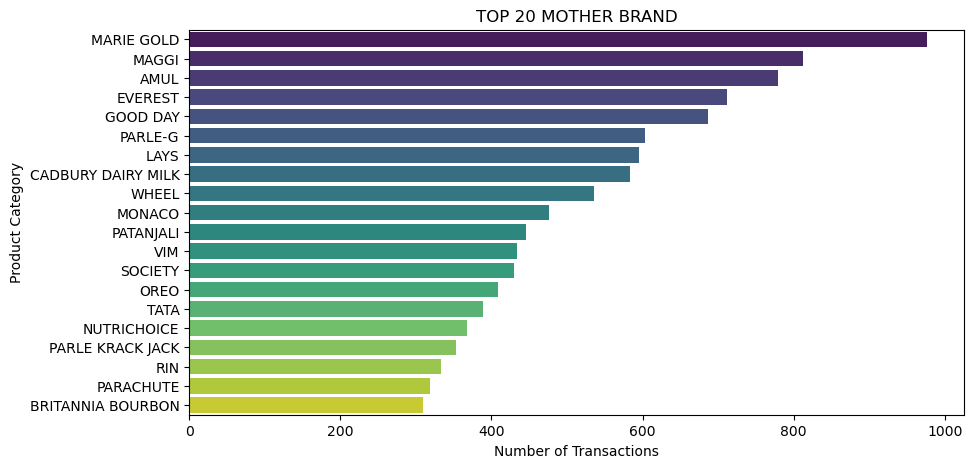

In [45]:
top_categories = df['MBRD'].value_counts().head(20)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.xlabel('Number of Transactions')
plt.ylabel('Product Category')
plt.title('TOP 20 MOTHER BRAND')
plt.show()

# 8. Comparison of Top 20 Category for Each Month

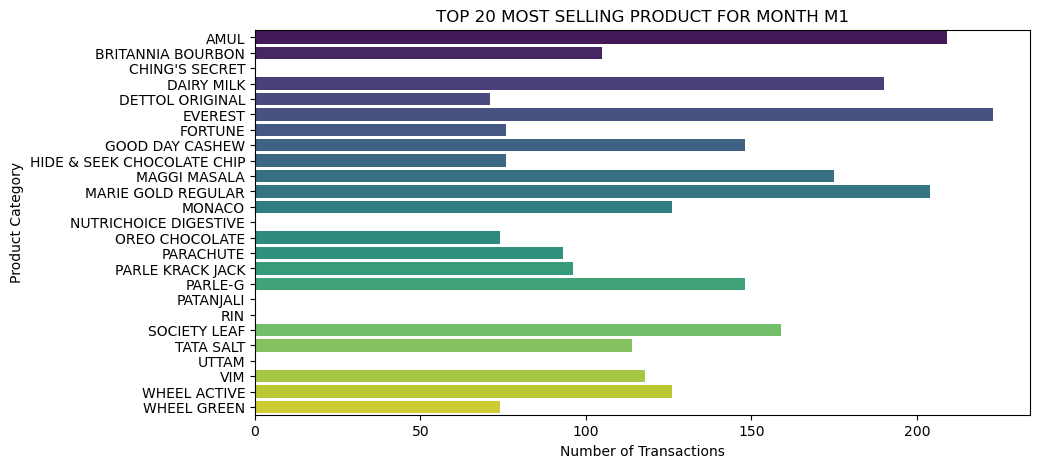

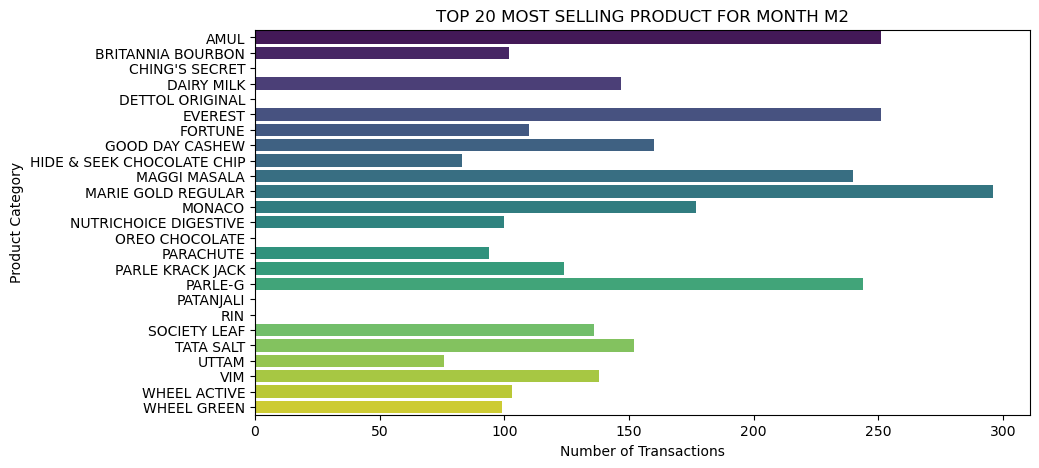

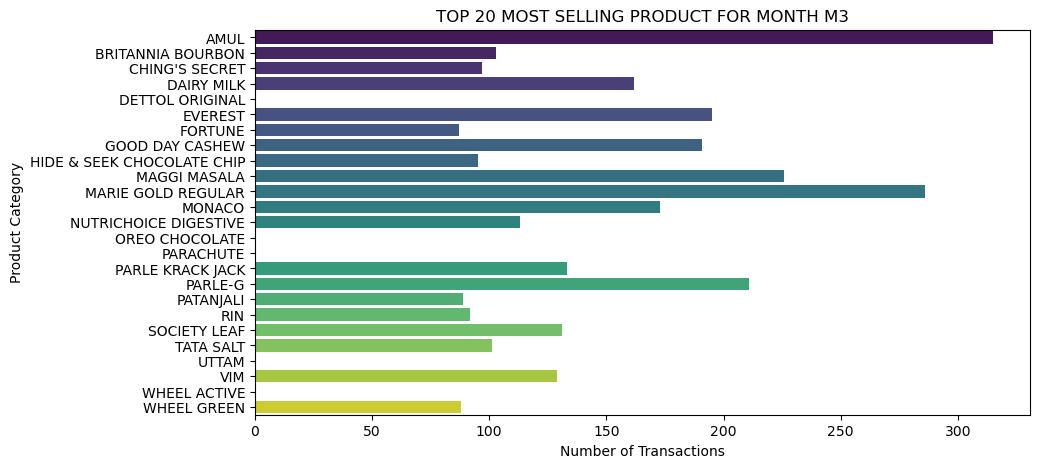

In [38]:
# Assuming your DataFrame is named 'df' and contains 'BRD' and 'MONTH' columns
top_categories_monthwise = df.groupby(['MONTH', 'BRD']).size().unstack().T
top_categories_monthwise = top_categories_monthwise.apply(lambda x: x.sort_values(ascending=False).head(20))

# Plot individual graphs for each month
for month in top_categories_monthwise.columns:
    top_categories = top_categories_monthwise[month]

    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
    plt.xlabel('Number of Transactions')
    plt.ylabel('Product Category')
    plt.title(f'TOP 20 MOST SELLING PRODUCT FOR MONTH {month}')
    plt.show()

# 9. Comparison of Top 20 Most Selling Category for Each Month

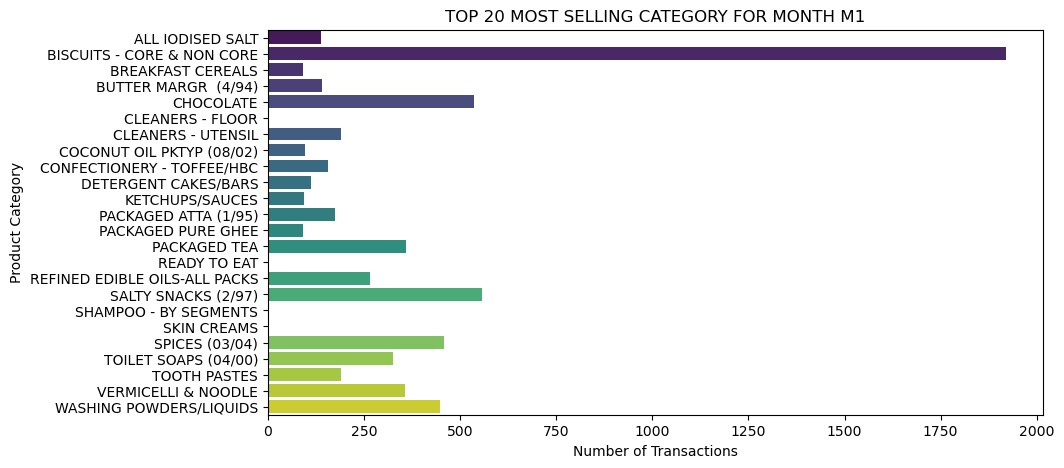

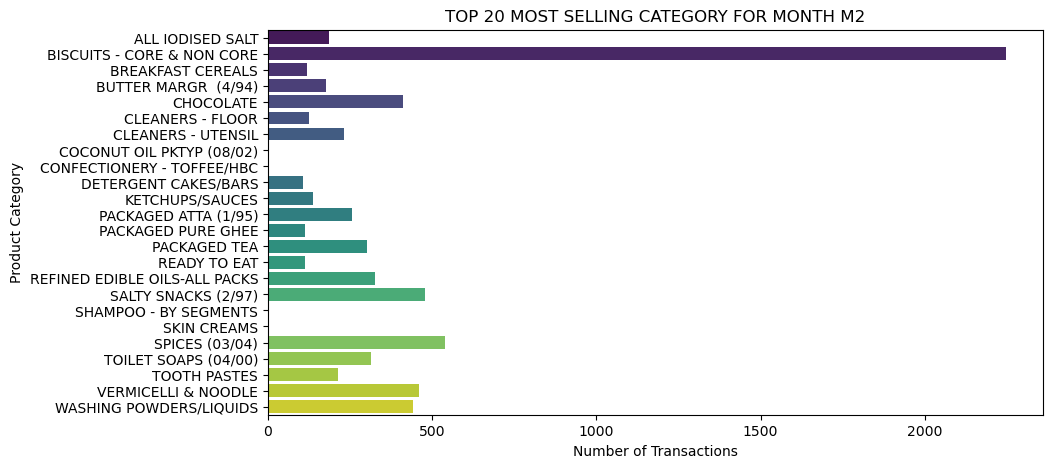

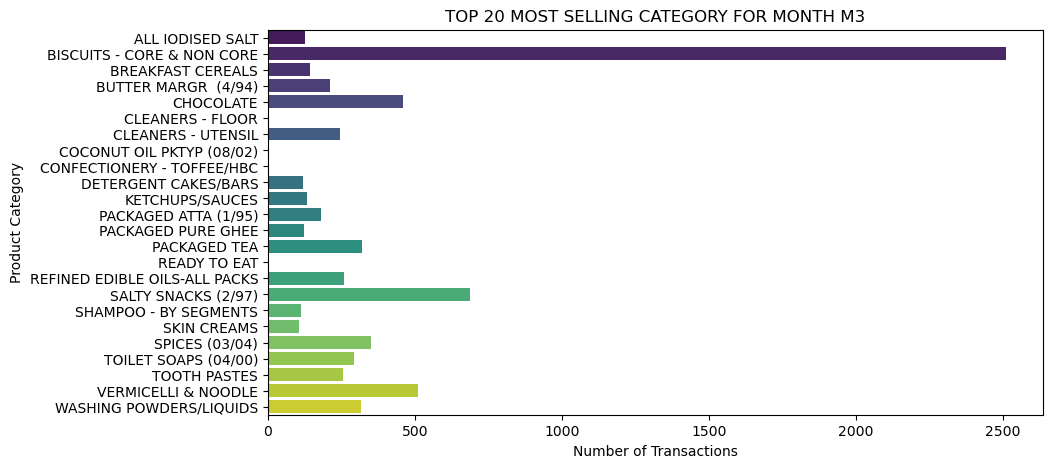

In [46]:
# Assuming your DataFrame is named 'df' and contains 'GRP' and 'MONTH' columns
top_categories_monthwise = df.groupby(['MONTH', 'GRP']).size().unstack().T
top_categories_monthwise = top_categories_monthwise.apply(lambda x: x.sort_values(ascending=False).head(20))

# Plot individual graphs for each month
for month in top_categories_monthwise.columns:
    top_categories = top_categories_monthwise[month]

    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
    plt.xlabel('Number of Transactions')
    plt.ylabel('Product Category')
    plt.title(f'TOP 20 MOST SELLING CATEGORY FOR MONTH {month}')
    plt.show()

# 10. Comparison of Top 20 Selling Company Product for Each Month

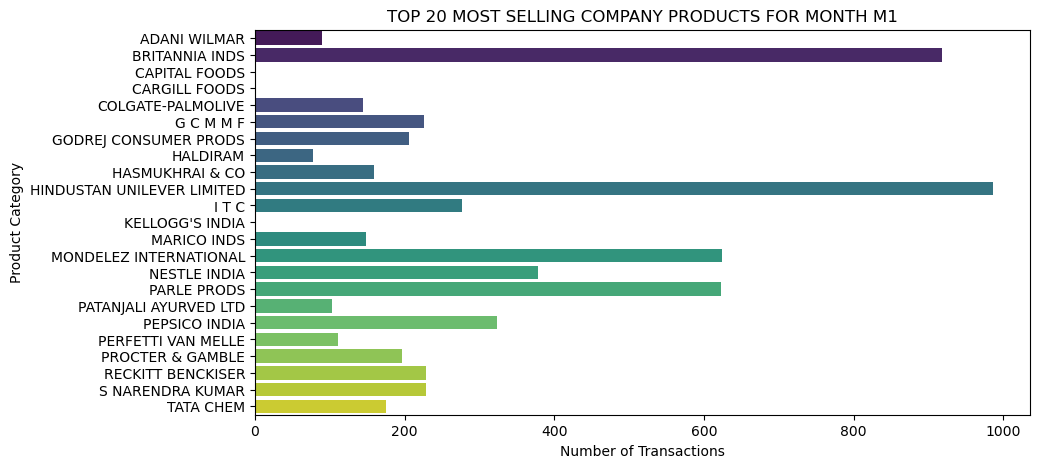

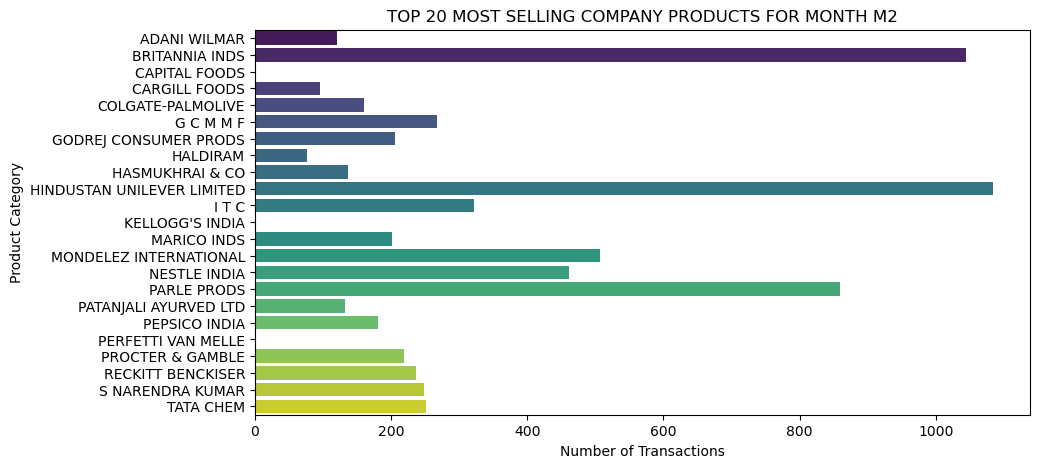

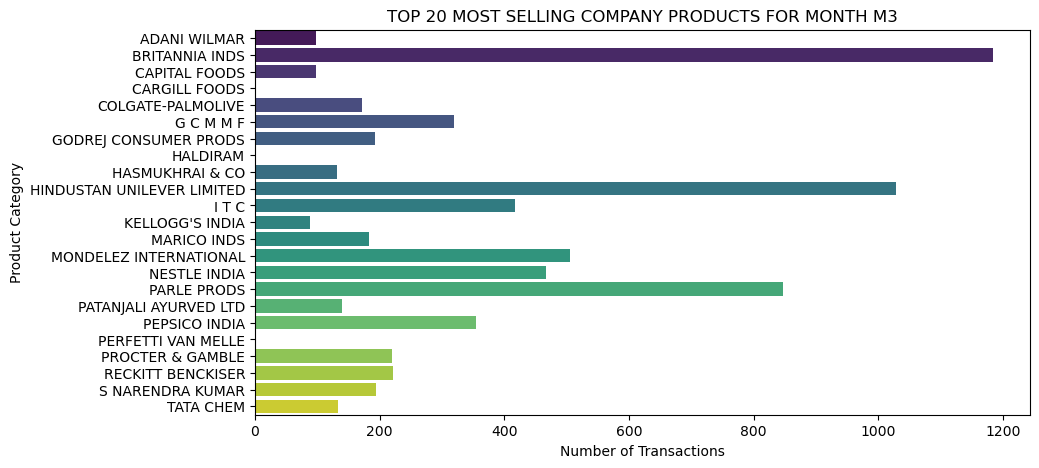

In [35]:
# Assuming your DataFrame is named 'df' and contains 'BRD' and 'MONTH' columns
top_categories_monthwise = df.groupby(['MONTH', 'CMP']).size().unstack().T
top_categories_monthwise = top_categories_monthwise.apply(lambda x: x.sort_values(ascending=False).head(20))

# Plot individual graphs for each month
for month in top_categories_monthwise.columns:
    top_categories = top_categories_monthwise[month]

    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
    plt.xlabel('Number of Transactions')
    plt.ylabel('Product Category')
    plt.title(f'TOP 20 MOST SELLING COMPANY PRODUCTS FOR MONTH {month}')
    plt.show()

# 11. Comparison of Top 20 Selling Mother Brand for Each Month

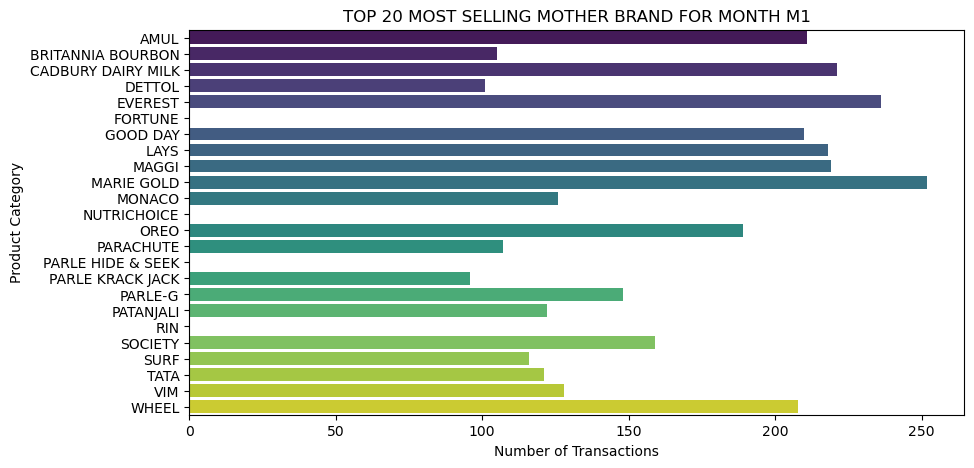

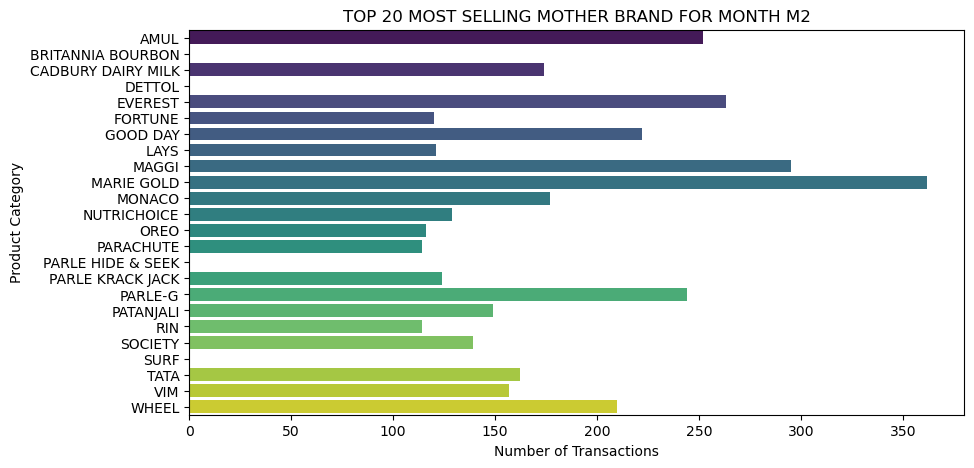

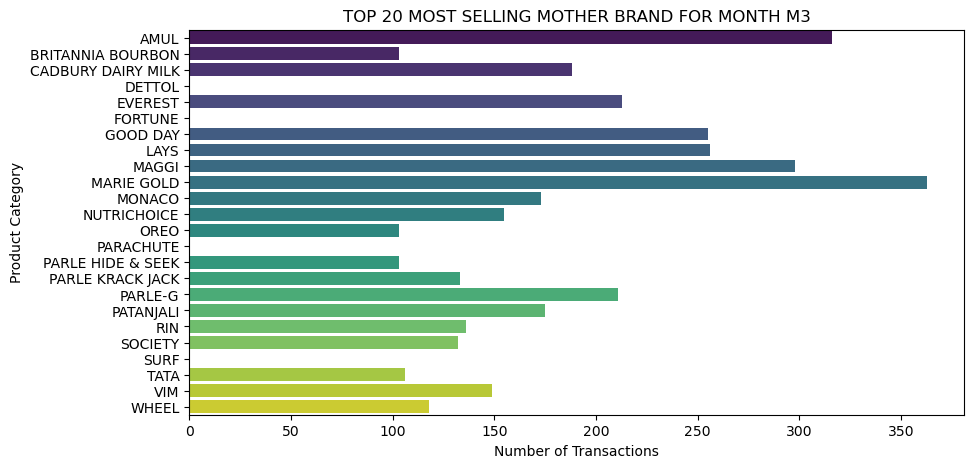

In [48]:
# Assuming your DataFrame is named 'df' and contains 'MBRD' and 'MONTH' columns
top_categories_monthwise = df.groupby(['MONTH', 'MBRD']).size().unstack().T
top_categories_monthwise = top_categories_monthwise.apply(lambda x: x.sort_values(ascending=False).head(20))

# Plot individual graphs for each month
for month in top_categories_monthwise.columns:
    top_categories = top_categories_monthwise[month]

    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
    plt.xlabel('Number of Transactions')
    plt.ylabel('Product Category')
    plt.title(f'TOP 20 MOST SELLING MOTHER BRAND FOR MONTH {month}')
    plt.show()